<a href="https://colab.research.google.com/github/drcrajc/adv_comm_lab/blob/main/modulated_signal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PART A: Complex Envelope g(t)
Interval 0≤t<1: g(t) = 0
Interval 1≤t≤2: g(t) = cos(2πt)
Interval 2<t≤4: g(t) = 0

Sample values:
t = 0.50: g(t) =  -0.0000
t = 1.00: g(t) =   1.0000
t = 1.25: g(t) =  -0.0020
t = 1.50: g(t) =  -1.0000
t = 1.75: g(t) =   0.0027
t = 2.00: g(t) =   1.0000
t = 3.00: g(t) =   0.0000

PART B: Instantaneous Amplitude A(t) and Phase φ(t)
Sample values:
t = 0.50: A(t) =   0.0000, φ(t) =    nan°
t = 1.00: A(t) =   1.0000, φ(t) =    0.0°
t = 1.25: A(t) =   0.0020, φ(t) =  180.0°
t = 1.50: A(t) =   1.0000, φ(t) =  180.0°
t = 1.75: A(t) =   0.0027, φ(t) =    0.0°
t = 2.00: A(t) =   1.0000, φ(t) =    0.0°
t = 3.00: A(t) =   0.0000, φ(t) =    nan°



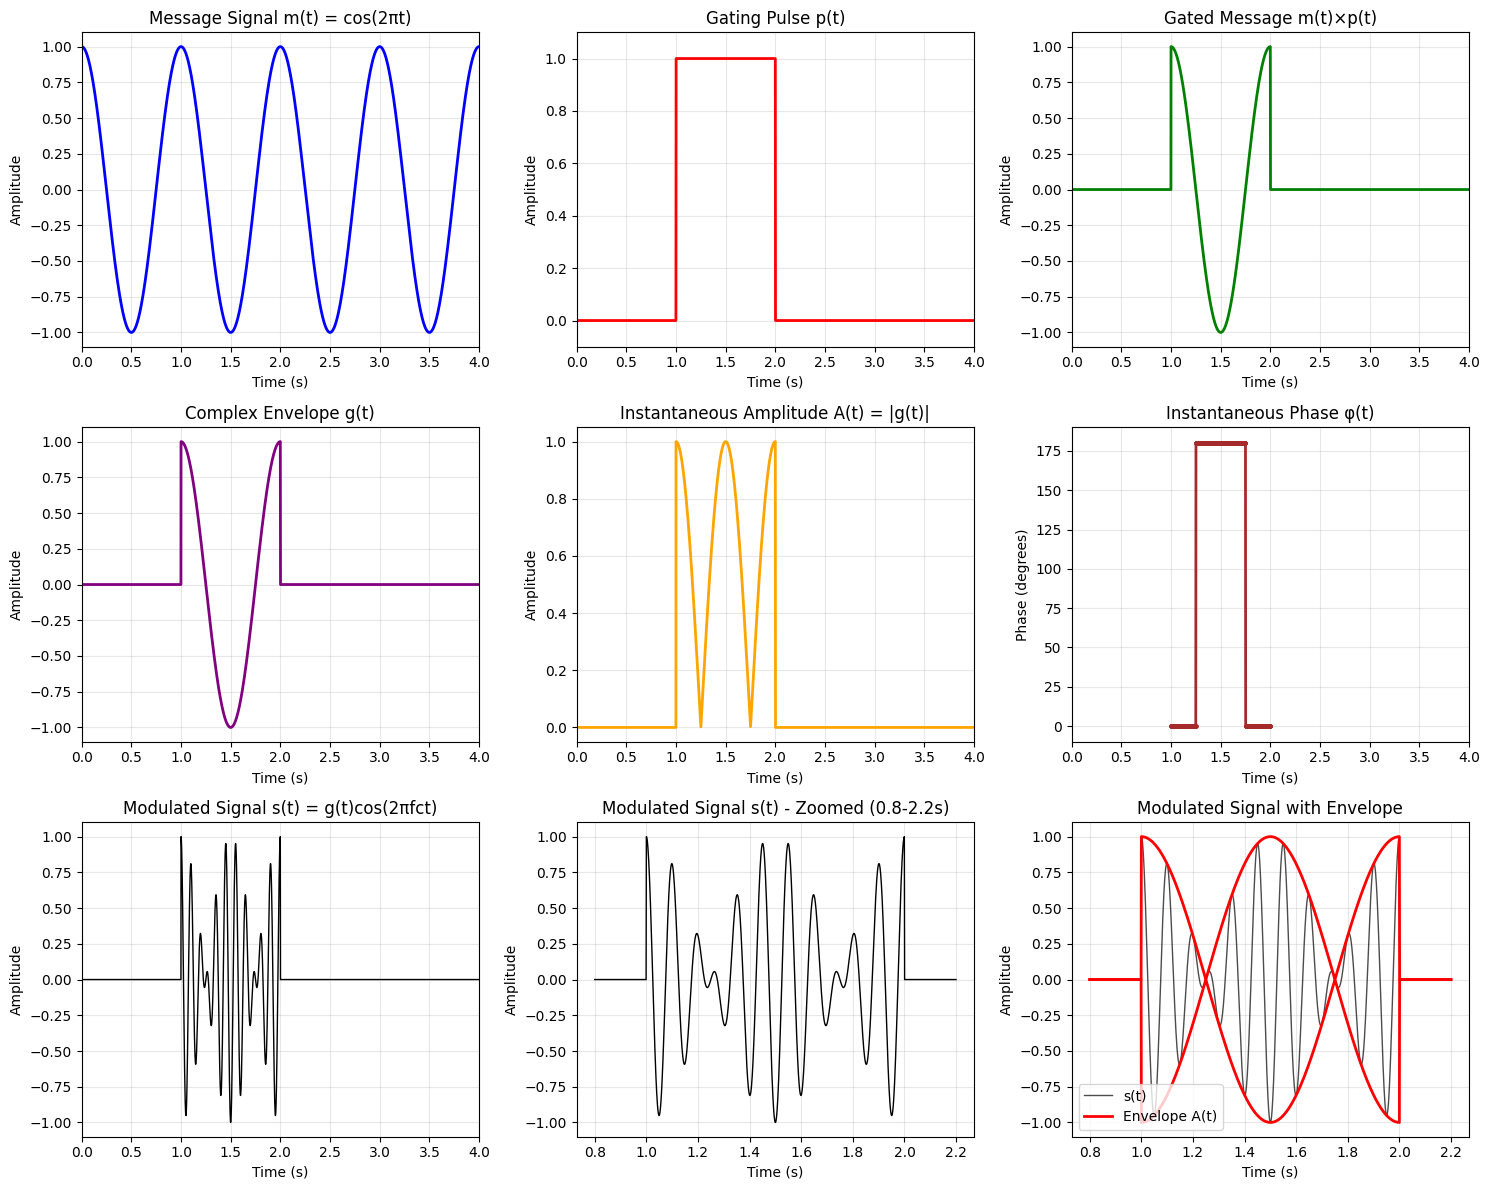

PART C: Frequency Domain Analysis


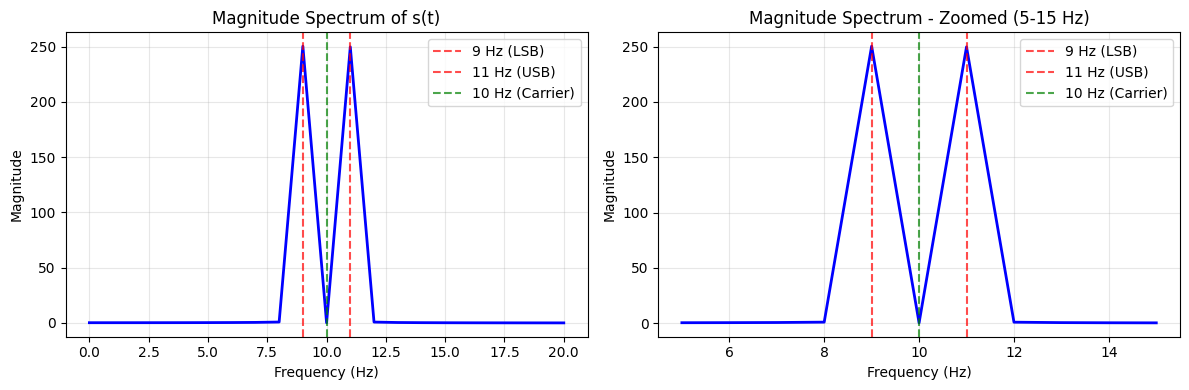


SUMMARY:
1. The complex envelope g(t) = cos(2πt) exists only in interval [1,2]
2. Instantaneous amplitude A(t) = |cos(2πt)| in interval [1,2]
3. Instantaneous phase φ(t) alternates between 0° and 180°
4. Modulated signal s(t) shows sidebands at 9 Hz and 11 Hz
5. No carrier component at 10 Hz (suppressed carrier AM)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fc = 10  # Carrier frequency in Hz
fs = 1000  # Sampling frequency (high enough to capture carrier)
t_start = 0
t_end = 4
t = np.linspace(t_start, t_end, int(fs * (t_end - t_start)))

# Define the message signal m(t)
def message_signal(t):
    return np.cos(2 * np.pi * t)

# Define the rectangular gating pulse p(t)
def gating_pulse(t):
    return np.where((t >= 1) & (t <= 2), 1, 0)

# Define the complex envelope g(t)
def complex_envelope(t):
    p_t = gating_pulse(t)
    m_t = message_signal(t)
    return m_t * p_t  # g(t) = cos(2πt) for 1≤t≤2, 0 elsewhere

# Compute instantaneous amplitude A(t)
def instantaneous_amplitude(t):
    g_t = complex_envelope(t)
    return np.abs(g_t)

# Compute instantaneous phase φ(t)
def instantaneous_phase(t):
    g_t = complex_envelope(t)
    # Phase is 0 when g(t) > 0, π when g(t) < 0, undefined when g(t) = 0
    phase = np.zeros_like(g_t)
    phase[g_t > 0] = 0
    phase[g_t < 0] = np.pi
    phase[g_t == 0] = np.nan  # Undefined when amplitude is zero
    return phase

# Compute the modulated signal s(t)
def modulated_signal(t):
    g_t = complex_envelope(t)
    carrier = np.cos(2 * np.pi * fc * t)
    return g_t * carrier

# Calculate all signals
m_t = message_signal(t)
p_t = gating_pulse(t)
gated_message = m_t * p_t
g_t = complex_envelope(t)
A_t = instantaneous_amplitude(t)
phi_t = instantaneous_phase(t)
s_t = modulated_signal(t)

# Print numerical values for specific intervals
print("PART A: Complex Envelope g(t)")
print("=" * 50)
print("Interval 0≤t<1: g(t) = 0")
print("Interval 1≤t≤2: g(t) = cos(2πt)")
print("Interval 2<t≤4: g(t) = 0")
print()

# Sample values at specific points
test_points = [0.5, 1.0, 1.25, 1.5, 1.75, 2.0, 3.0]
print("Sample values:")
for tp in test_points:
    idx = np.argmin(np.abs(t - tp))
    print(f"t = {tp:4.2f}: g(t) = {g_t[idx]:8.4f}")
print()

print("PART B: Instantaneous Amplitude A(t) and Phase φ(t)")
print("=" * 50)
print("Sample values:")
for tp in test_points:
    idx = np.argmin(np.abs(t - tp))
    phase_deg = phi_t[idx] * 180 / np.pi if not np.isnan(phi_t[idx]) else np.nan
    print(f"t = {tp:4.2f}: A(t) = {A_t[idx]:8.4f}, φ(t) = {phase_deg:6.1f}°")
print()

# Create comprehensive plots
fig = plt.figure(figsize=(15, 12))

# Plot 1: Message signal m(t)
plt.subplot(3, 3, 1)
plt.plot(t, m_t, 'b-', linewidth=2)
plt.title('Message Signal m(t) = cos(2πt)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True, alpha=0.3)
plt.xlim(0, 4)

# Plot 2: Gating pulse p(t)
plt.subplot(3, 3, 2)
plt.plot(t, p_t, 'r-', linewidth=2)
plt.title('Gating Pulse p(t)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True, alpha=0.3)
plt.xlim(0, 4)
plt.ylim(-0.1, 1.1)

# Plot 3: Gated message m(t)×p(t)
plt.subplot(3, 3, 3)
plt.plot(t, gated_message, 'g-', linewidth=2)
plt.title('Gated Message m(t)×p(t)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True, alpha=0.3)
plt.xlim(0, 4)

# Plot 4: Complex envelope g(t)
plt.subplot(3, 3, 4)
plt.plot(t, g_t, 'purple', linewidth=2)
plt.title('Complex Envelope g(t)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True, alpha=0.3)
plt.xlim(0, 4)

# Plot 5: Instantaneous amplitude A(t)
plt.subplot(3, 3, 5)
plt.plot(t, A_t, 'orange', linewidth=2)
plt.title('Instantaneous Amplitude A(t) = |g(t)|')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True, alpha=0.3)
plt.xlim(0, 4)

# Plot 6: Instantaneous phase φ(t)
plt.subplot(3, 3, 6)
# Convert to degrees for better visualization
phi_t_deg = phi_t * 180 / np.pi
plt.plot(t, phi_t_deg, 'brown', linewidth=2, marker='o', markersize=2)
plt.title('Instantaneous Phase φ(t)')
plt.xlabel('Time (s)')
plt.ylabel('Phase (degrees)')
plt.grid(True, alpha=0.3)
plt.xlim(0, 4)
plt.ylim(-10, 190)

# Plot 7: Modulated signal s(t) - Full view
plt.subplot(3, 3, 7)
plt.plot(t, s_t, 'k-', linewidth=1)
plt.title('Modulated Signal s(t) = g(t)cos(2πfct)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True, alpha=0.3)
plt.xlim(0, 4)

# Plot 8: Modulated signal s(t) - Zoomed view (1 to 2 seconds)
plt.subplot(3, 3, 8)
t_zoom_mask = (t >= 0.8) & (t <= 2.2)
plt.plot(t[t_zoom_mask], s_t[t_zoom_mask], 'k-', linewidth=1)
plt.title('Modulated Signal s(t) - Zoomed (0.8-2.2s)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True, alpha=0.3)

# Plot 9: Envelope of modulated signal
plt.subplot(3, 3, 9)
t_zoom_mask = (t >= 0.8) & (t <= 2.2)
plt.plot(t[t_zoom_mask], s_t[t_zoom_mask], 'k-', linewidth=1, alpha=0.7, label='s(t)')
plt.plot(t[t_zoom_mask], A_t[t_zoom_mask], 'r-', linewidth=2, label='Envelope A(t)')
plt.plot(t[t_zoom_mask], -A_t[t_zoom_mask], 'r-', linewidth=2)
plt.title('Modulated Signal with Envelope')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

# Frequency domain analysis
print("PART C: Frequency Domain Analysis")
print("=" * 50)

# Compute FFT for the active interval (1 to 2 seconds)
t_active_mask = (t >= 1) & (t <= 2)
s_active = s_t[t_active_mask]
t_active = t[t_active_mask]

# FFT analysis
N = len(s_active)
frequencies = np.fft.fftfreq(N, 1/fs)
S_f = np.fft.fft(s_active)
magnitude_spectrum = np.abs(S_f)

# Plot frequency spectrum
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
# Plot only positive frequencies up to 20 Hz
freq_mask = (frequencies >= 0) & (frequencies <= 20)
plt.plot(frequencies[freq_mask], magnitude_spectrum[freq_mask], 'b-', linewidth=2)
plt.title('Magnitude Spectrum of s(t)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True, alpha=0.3)
plt.axvline(x=9, color='r', linestyle='--', alpha=0.7, label='9 Hz (LSB)')
plt.axvline(x=11, color='r', linestyle='--', alpha=0.7, label='11 Hz (USB)')
plt.axvline(x=10, color='g', linestyle='--', alpha=0.7, label='10 Hz (Carrier)')
plt.legend()

plt.subplot(1, 2, 2)
# Zoom in around the carrier frequency
freq_zoom_mask = (frequencies >= 5) & (frequencies <= 15)
plt.plot(frequencies[freq_zoom_mask], magnitude_spectrum[freq_zoom_mask], 'b-', linewidth=2)
plt.title('Magnitude Spectrum - Zoomed (5-15 Hz)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True, alpha=0.3)
plt.axvline(x=9, color='r', linestyle='--', alpha=0.7, label='9 Hz (LSB)')
plt.axvline(x=11, color='r', linestyle='--', alpha=0.7, label='11 Hz (USB)')
plt.axvline(x=10, color='g', linestyle='--', alpha=0.7, label='10 Hz (Carrier)')
plt.legend()

plt.tight_layout()
plt.show()

# Summary
print("\nSUMMARY:")
print("=" * 50)
print("1. The complex envelope g(t) = cos(2πt) exists only in interval [1,2]")
print("2. Instantaneous amplitude A(t) = |cos(2πt)| in interval [1,2]")
print("3. Instantaneous phase φ(t) alternates between 0° and 180°")
print("4. Modulated signal s(t) shows sidebands at 9 Hz and 11 Hz")
print("5. No carrier component at 10 Hz (suppressed carrier AM)")